Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn,optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import zipfile
import shutil
import os
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
class AlexNet(nn.Module):

  def __init__(self, num_classes=2):
    super(AlexNet, self).__init__()

    self.convolutional = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),

        nn.Conv2d(64, 192, kernel_size=5, padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),

        nn.Conv2d(192, 384, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride =2)
    )

    self.avgpool = nn.AdaptiveAvgPool2d((6,6))
    self.linear = nn.Sequential(
        nn.Dropout(),
        nn.Linear(256*6*6, 4096),
        nn.ReLU(inplace=True),

        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),

        nn.Linear(4096, 2)
    )

  def forward(self, x):
    x = self.convolutional(x)
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    x = self.linear(x)
    return torch.sigmoid(x)

In [ ]:
model = AlexNet()

In [ ]:
!mkdir data_faces

In [ ]:
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip

--2025-06-16 06:00:50--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.192.56, 52.219.193.184, 52.219.194.56, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.192.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘celeba.zip’

celeba.zip          100%[===================>]   1.34G  15.2MB/s    in 74s     

2025-06-16 06:02:04 (18.7 MB/s) - ‘celeba.zip’ saved [1443490838/1443490838]



In [ ]:
with zipfile.ZipFile('celeba.zip', 'r') as zip_ref:
  zip_ref.extractall('data_faces/')

In [ ]:
root = 'data_faces/img_align_celeba'
img_list = os.listdir(root)
print(len(img_list))

202599


In [ ]:
df = pd.read_csv('list_attr_celeba.csv')
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162002,162003.jpg,-1,-1,1,1,-1,-1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
162003,162004.jpg,1,-1,1,-1,-1,-1,-1,-1,-1,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
162004,162005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
162005,162006.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [ ]:
df = df[['image_id','Smiling']]
df

,image_id,Smiling
0,000001.jpg,1.0
1,000002.jpg,1.0
2,000003.jpg,-1.0
3,000004.jpg,-1.0
4,000005.jpg,-1.0
...,...,...
162002,162003.jpg,-1.0
162003,162004.jpg,-1.0
162004,162005.jpg,1.0
162005,162006.jpg,-1.0


In [ ]:
num = 1500
s0, s1 = 0,0

In [ ]:
for i,(_,i_row) in enumerate(df.iterrows()):
  if s0<num:
    if i_row['Smiling'] == 1:
      s0 += 1
      shutil.copyfile('data_faces/img_align_celeba/' + i_row['image_id'],'Data/smile/' + i_row['image_id'])
  if s1<num:
    if i_row['Smiling'] == -1:
      s1 += 1
      shutil.copyfile('data_faces/img_align_celeba/' + i_row['image_id'],'Data/no_smile/' + i_row['image_id'])



In [ ]:
img_list = os.listdir('Data/smile')
img_list.extend(os.listdir('Data/no_smile'))

In [ ]:
!rm -rf 'Data/.ipynb_checkpoints'

In [ ]:
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

celeba_data = datasets.ImageFolder('Data', transform=transform)

In [ ]:
train_size = int(len(img_list) * 0.75)
test_size = len(img_list) - train_size

In [ ]:
train_set, test_set = torch.utils.data.random_split(celeba_data,[train_size,test_size])

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [ ]:
epochs = 10
train_loss = []

for epoch in range(epochs):
  total_train_loss = 0

  for idx, (image, label) in enumerate(train_loader):
    optimizer.zero_grad()

    pred = model(image)
    loss = criterion(pred, label)

    total_train_loss += loss.item()

    loss.backward()
    optimizer.step()
  print(total_train_loss)
  total_train_loss = total_train_loss / (idx+1)
  train_loss.append(total_train_loss)

18.658396810293198
17.23703783750534
16.48639890551567
15.62183341383934
15.976269096136093
15.493268102407455
14.723531782627106
14.083812445402145
13.9051034450531
14.54977759718895


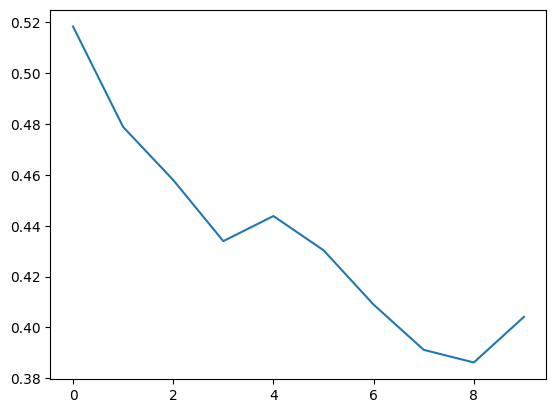

In [ ]:
plt.plot(train_loss)

In [ ]:
testiter = iter(test_loader)
images, labels = next(testiter)

In [ ]:
with torch.no_grad():
  pred = model(images)

In [ ]:
images_np = [i.cpu() for i in images]
class_names = celeba_data.classes

In [ ]:
print(class_names)

['no_smile', 'smile']


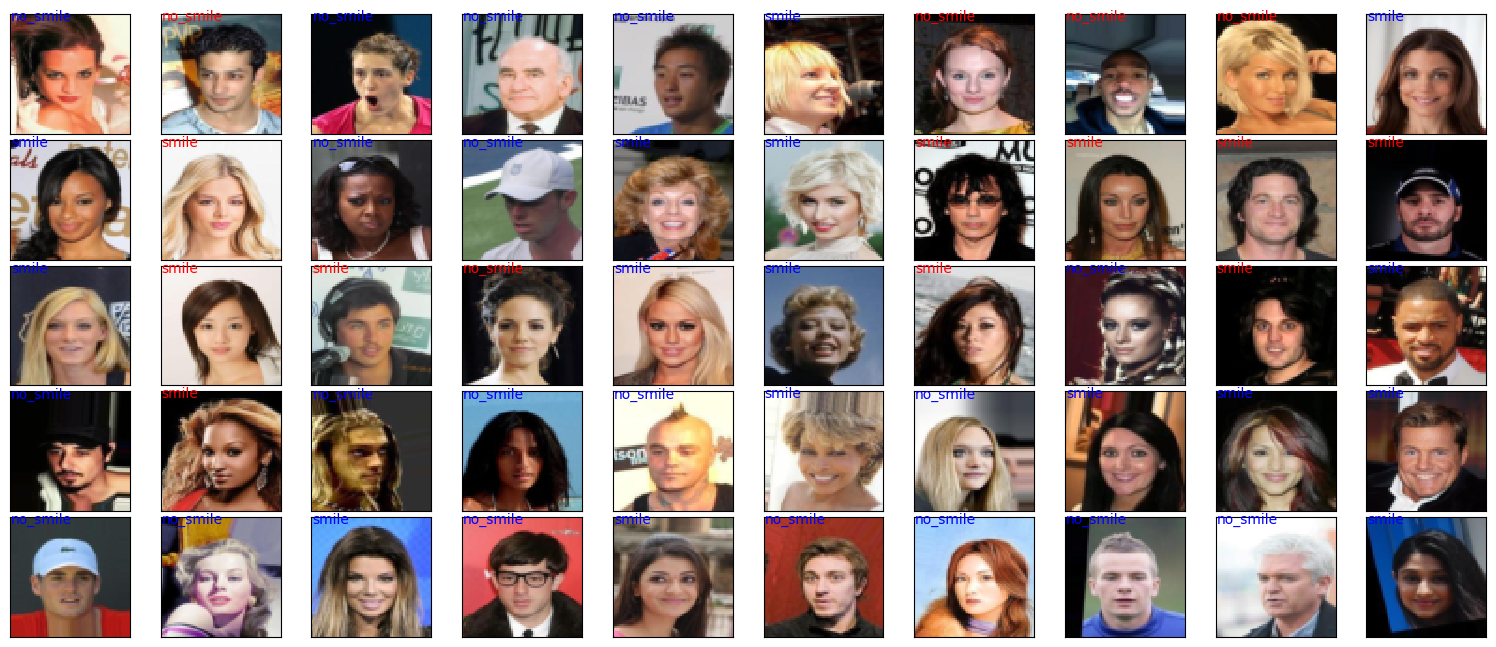

In [ ]:
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0, right=1, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
  ax = fig.add_subplot(5, 10, i+1, xticks=[], yticks=[])
  ax.imshow(images_np[i].permute(1,2,0), cmap=plt.cm.gray_r, interpolation='nearest')

  if labels[i] == torch.max(pred[i],0)[1]:
    ax.text(0,3, class_names[torch.max(pred[i], 0)[1]], color='blue')
  else:
    ax.text(0, 3, class_names[torch.max(pred[i], 0)[1]], color='red')